# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 치과의원

In [10]:
# 치과의원만 남기기
ap_dent = df_ap_quarter[df_ap_quarter.업종명 == '치과의원'].reset_index().drop('index', axis=1)
ap_dent

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,의료,치과의원,압구정동,5321360661,52,0,3
1,2017-2,서비스,의료,치과의원,압구정동,4588717957,52,1,1
2,2017-3,서비스,의료,치과의원,압구정동,4845074981,50,1,3
3,2017-4,서비스,의료,치과의원,압구정동,3824163692,50,1,1
4,2018-1,서비스,의료,치과의원,압구정동,4856040186,48,1,3
5,2018-2,서비스,의료,치과의원,압구정동,4310992040,47,0,1
6,2018-3,서비스,의료,치과의원,압구정동,4514629614,47,0,0
7,2018-4,서비스,의료,치과의원,압구정동,4295391222,48,2,1
8,2019-1,서비스,의료,치과의원,압구정동,4753225247,48,0,0
9,2019-2,서비스,의료,치과의원,압구정동,4639036441,48,0,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_dent['성장성'] = ap_dent['분기당_매출_금액'] / ap_dent['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_dent['성장성'][0] = 1

ap_dent

<ipython-input-11-b7a9aa1aec85>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_dent['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,의료,치과의원,압구정동,5321360661,52,0,3,1.000000
1,2017-2,서비스,의료,치과의원,압구정동,4588717957,52,1,1,0.862320
2,2017-3,서비스,의료,치과의원,압구정동,4845074981,50,1,3,1.055867
3,2017-4,서비스,의료,치과의원,압구정동,3824163692,50,1,1,0.789289
4,2018-1,서비스,의료,치과의원,압구정동,4856040186,48,1,3,1.269831
5,2018-2,서비스,의료,치과의원,압구정동,4310992040,47,0,1,0.887759
6,2018-3,서비스,의료,치과의원,압구정동,4514629614,47,0,0,1.047237
7,2018-4,서비스,의료,치과의원,압구정동,4295391222,48,2,1,0.951438
8,2019-1,서비스,의료,치과의원,압구정동,4753225247,48,0,0,1.106587
9,2019-2,서비스,의료,치과의원,압구정동,4639036441,48,0,0,0.975977


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_dent['개업률'] = (ap_dent['개업점포수'] / ap_dent['총 점포수']) * 100
ap_dent['폐업률'] = (ap_dent['폐업점포수'] / ap_dent['총 점포수']) * 100
ap_dent['순점포증감률'] = ((ap_dent['개업점포수'] - ap_dent['폐업점포수']) / ap_dent['총 점포수']) * 100

ap_dent

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,서비스,의료,치과의원,압구정동,5321360661,52,0,3,1.000000,0.000000,5.769231,-5.769231
1,2017-2,서비스,의료,치과의원,압구정동,4588717957,52,1,1,0.862320,1.923077,1.923077,0.000000
2,2017-3,서비스,의료,치과의원,압구정동,4845074981,50,1,3,1.055867,2.000000,6.000000,-4.000000
3,2017-4,서비스,의료,치과의원,압구정동,3824163692,50,1,1,0.789289,2.000000,2.000000,0.000000
4,2018-1,서비스,의료,치과의원,압구정동,4856040186,48,1,3,1.269831,2.083333,6.250000,-4.166667
5,2018-2,서비스,의료,치과의원,압구정동,4310992040,47,0,1,0.887759,0.000000,2.127660,-2.127660
6,2018-3,서비스,의료,치과의원,압구정동,4514629614,47,0,0,1.047237,0.000000,0.000000,0.000000
7,2018-4,서비스,의료,치과의원,압구정동,4295391222,48,2,1,0.951438,4.166667,2.083333,2.083333
8,2019-1,서비스,의료,치과의원,압구정동,4753225247,48,0,0,1.106587,0.000000,0.000000,0.000000
9,2019-2,서비스,의료,치과의원,압구정동,4639036441,48,0,0,0.975977,0.000000,0.000000,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 치과의원만 남기기
gangnam_dent = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '치과의원'].reset_index()

################################################################################################################################################################################################

ap_dent['시장성'] = (ap_dent['분기당_매출_금액'] / ap_dent['총 점포수']) - (gangnam_dent['분기당_매출_금액'] / gangnam_dent['총 점포수'])

ap_dent = ap_dent[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_dent

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,치과의원,5321360661,1.000000,-5.769231,-2.668922e+07
1,2017-2,치과의원,4588717957,0.862320,0.000000,-2.962512e+07
2,2017-3,치과의원,4845074981,1.055867,-4.000000,-2.988224e+07
3,2017-4,치과의원,3824163692,0.789289,0.000000,-3.674824e+07
4,2018-1,치과의원,4856040186,1.269831,-4.166667,-2.639951e+07
5,2018-2,치과의원,4310992040,0.887759,-2.127660,-2.662756e+07
6,2018-3,치과의원,4514629614,1.047237,0.000000,-2.669582e+07
7,2018-4,치과의원,4295391222,0.951438,2.083333,-3.481588e+07
8,2019-1,치과의원,4753225247,1.106587,0.000000,-3.297002e+07
9,2019-2,치과의원,4639036441,0.975977,0.000000,-2.603194e+07


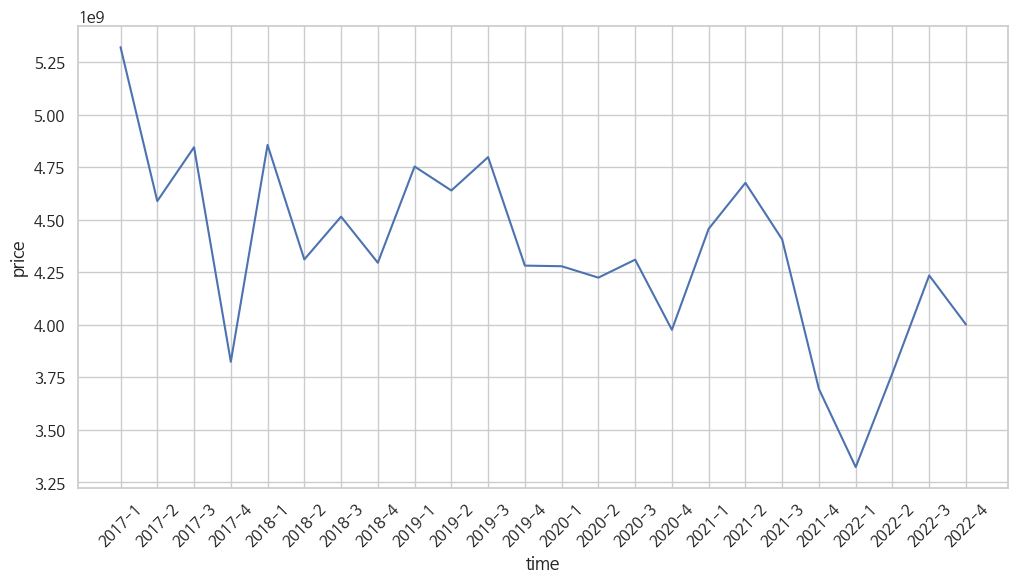

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_dent['분기'], y=ap_dent['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_dent[['성장성', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.668922e+07 -5.769231
1   0.862320 -2.962512e+07  0.000000
2   1.055867 -2.988224e+07 -4.000000
3   0.789289 -3.674824e+07  0.000000
4   1.269831 -2.639951e+07 -4.166667
5   0.887759 -2.662756e+07 -2.127660
6   1.047237 -2.669582e+07  0.000000
7   0.951438 -3.481588e+07  2.083333
8   1.106587 -3.297002e+07  0.000000
9   0.975977 -2.603194e+07  0.000000
10  1.034247 -3.012013e+07  2.040816
11  0.892406 -3.874265e+07  2.000000
12  0.999305 -3.182309e+07 -2.040816
13  0.987328 -3.027437e+07  0.000000
14  1.020236 -3.746152e+07  2.040816
15  0.922552 -4.894777e+07  3.921569
16  1.120847 -4.671640e+07  1.923077
17  1.049094 -4.509202e+07  0.000000
18  0.942365 -4.782790e+07 -1.960784
19  0.838510 -6.087862e+07 -2.000000
20  0.899441 -6.274912e+07  0.000000
21  1.134685 -5.628564e+07  0.000000
22  1.123164 -4.859518e+07  1.960784
23  0.944840 -4.548958e+07 -4.081633
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.69478859 0.38548541 0.79766537]
 [0.32369916 0.4700673  0.17414437]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3938
Epoch 1: val_loss improved from inf to 0.26033, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3938 - val_loss: 0.2603
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3769
Epoch 2: val_loss improved from 0.26033 to 0.24827, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.3769 - val_loss: 0.2483
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3608
Epoch 3: val_loss improved from 0.24827 to 0.23673, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.3608 - val_loss: 0.2367
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3453
Epoch 4: val_loss improved from 0.23673 to 0.22563, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.3453 - val_loss: 0.2256
Epoch 5/100
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 656ms/step
[[0.32142437]
 [0.2759445 ]
 [0.32751536]
 [0.4078982 ]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.000000,0.321424
2022-2,0.223957,0.275945
2022-3,0.456340,0.327515
2022-4,0.339447,0.407898


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_dent의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.000000,0.321424,3322970136,3.965302e+09,-642331368.0
2022-2,0.223957,0.275945,3770523683,3.874415e+09,-103891165.0
2022-3,0.456340,0.327515,4234915697,3.977474e+09,257441905.0
2022-4,0.339447,0.407898,4001317003,4.138110e+09,-136792949.0


In [26]:
df_test = df_test.reset_index()

### 결과

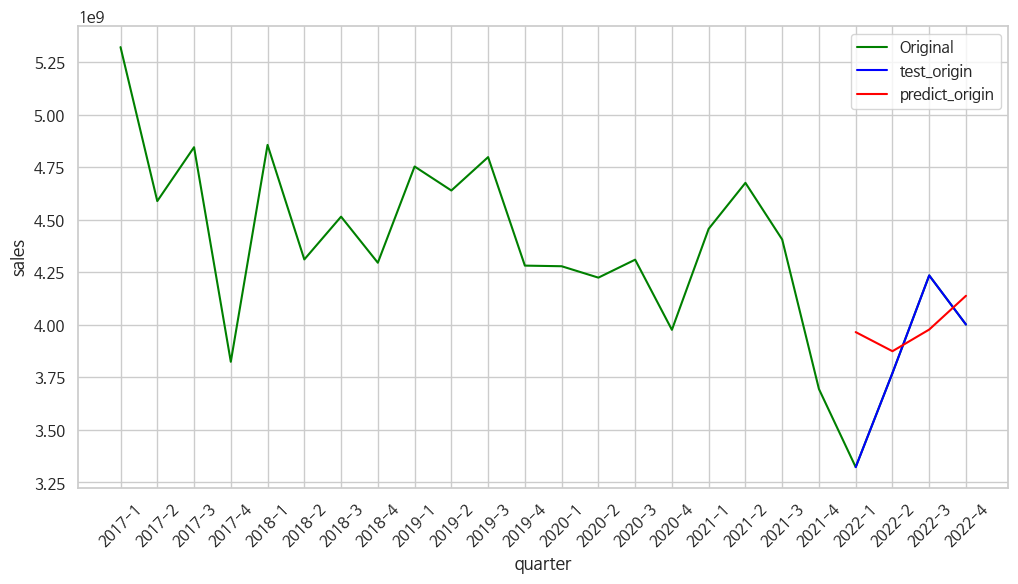

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.563934e+08
std      3.699261e+08
min     -6.423314e+08
25%     -2.631776e+08
50%     -1.203421e+08
75%     -1.355790e+07
max      2.574419e+08
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 20ms/step
[[0.410219]]
--------------------------------------------------------------------------------
예측된 매출  : 4142747904.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   5321360661 -2.668922e+07 -5.769231
1   4588717957 -2.962512e+07  0.000000
2   4845074981 -2.988224e+07 -4.000000
3   3824163692 -3.674824e+07  0.000000
4   4856040186 -2.639951e+07 -4.166667
5   4310992040 -2.662756e+07 -2.127660
6   4514629614 -2.669582e+07  0.000000
7   4295391222 -3.481588e+07  2.083333
8   4753225247 -3.297002e+07  0.000000
9   4639036441 -2.603194e+07  0.000000
10  4797910524 -3.012013e+07  2.040816
11  4281682693 -3.874265e+07  2.000000
12  4278705338 -3.182309e+07 -2.040816
13  4224486750 -3.027437e+07  0.000000
14  4309971865 -3.746152e+07  2.040816
15  3976173167 -4.894777e+07  3.921569
16  4456682137 -4.671640e+07  1.923077
17  4675478499 -4.509202e+07  0.000000
18  4406009476 -4.782790e+07 -1.960784
19  3694481850 -6.087862e+07 -2.000000
20  3322970136 -6.274912e+07  0.000000
21  3770523683 -5.628564e+07  0.000000
22  4234915697 -4.859518e+07  1.960784
23  4001317003 -4.548958e+07 -4.081633
-------------------------

In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.45634001 0.38548541 0.79766537]
 [0.3394466  0.4700673  0.17414437]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2890
Epoch 1: val_loss improved from inf to 0.20611, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2890 - val_loss: 0.2061
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2752
Epoch 2: val_loss improved from 0.20611 to 0.19561, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2752 - val_loss: 0.1956
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2620
Epoch 3: val_loss improved from 0.19561 to 0.18561, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.2620 - val_loss: 0.1856
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2495
Epoch 4: val_loss improved from 0.18561 to 0.17607, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.2495 - val_loss: 0.1761
Epoch 5/100
1/1 [=================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 640ms/step
[[0.29326478]
 [0.23542449]
 [0.25087893]
 [0.31211206]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.229226,0.293265
2022-2,0.718764,0.235424
2022-3,0.694789,0.250879
2022-4,0.323699,0.312112


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 3].values       # 성장성이 ap_dent의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.229226,0.293265,0.899441,0.930215,-0.030773
2022-2,0.718764,0.235424,1.134685,0.902420,0.232265
2022-3,0.694789,0.250879,1.123164,0.909847,0.213317
2022-4,0.323699,0.312112,0.944840,0.939272,0.005568


### 결과

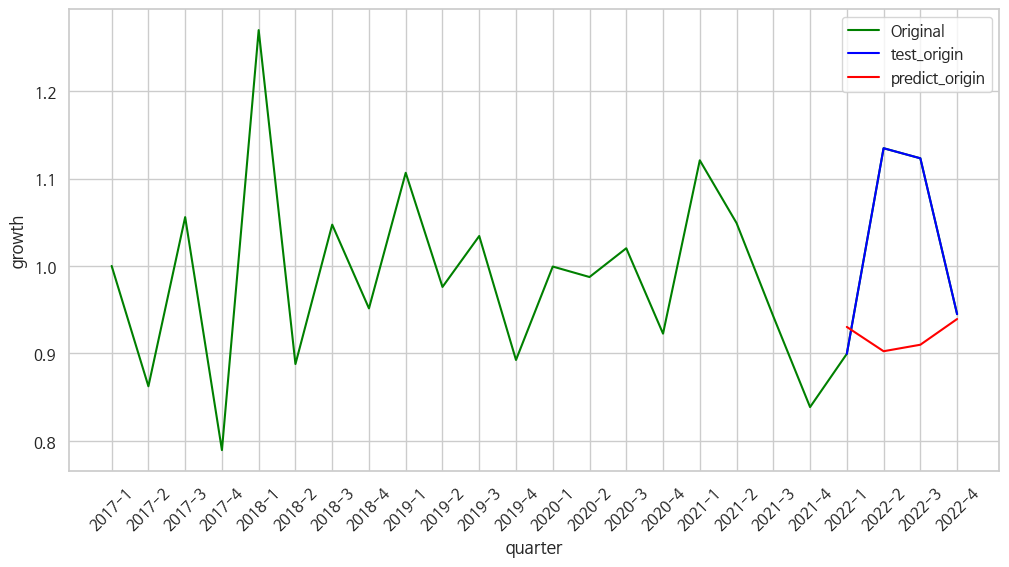

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.105094
std      0.136931
min     -0.030773
25%     -0.003517
50%      0.109443
75%      0.218054
max      0.232265
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 18ms/step
[[0.3341785]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9498755931854248 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_dent[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_dent.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  5321360661 -5.769231
1   0.862320  4588717957  0.000000
2   1.055867  4845074981 -4.000000
3   0.789289  3824163692  0.000000
4   1.269831  4856040186 -4.166667
5   0.887759  4310992040 -2.127660
6   1.047237  4514629614  0.000000
7   0.951438  4295391222  2.083333
8   1.106587  4753225247  0.000000
9   0.975977  4639036441  0.000000
10  1.034247  4797910524  2.040816
11  0.892406  4281682693  2.000000
12  0.999305  4278705338 -2.040816
13  0.987328  4224486750  0.000000
14  1.020236  4309971865  2.040816
15  0.922552  3976173167  3.921569
16  1.120847  4456682137  1.923077
17  1.049094  4675478499  0.000000
18  0.942365  4406009476 -1.960784
19  0.838510  3694481850 -2.000000
20  0.899441  3322970136  0.000000
21  1.134685  3770523683  0.000000
22  1.123164  4234915697  1.960784
23  0.944840  4001317003 -4.081633
--------------------------------------------------------------------------------
             시장성
0  -2.668922e+07
1  -2.9625

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.69478859 0.45634001 0.79766537]
 [0.32369916 0.3394466  0.17414437]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7970
Epoch 1: val_loss improved from inf to 0.15828, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.7970 - val_loss: 0.1583
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.7752
Epoch 2: val_loss improved from 0.15828 to 0.14877, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.7752 - val_loss: 0.1488
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.7541
Epoch 3: val_loss improved from 0.14877 to 0.13972, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.7541 - val_loss: 0.1397
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.7335
Epoch 4: val_loss improved from 0.13972 to 0.13108, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.7335 - val_loss: 0.1311
Epoch 5/100
1/1 [=================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 578ms/step
[[0.26926872]
 [0.24077299]
 [0.28156993]
 [0.3480114 ]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.000000,0.269269
2022-2,0.176034,0.240773
2022-3,0.385485,0.281570
2022-4,0.470067,0.348011


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 5].values       # 시장성이 ap_dent의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.000000,0.269269,-6.274912e+07,-52862332.0,-9.886788e+06
2022-2,0.176034,0.240773,-5.628564e+07,-53908616.0,-2.377021e+06
2022-3,0.385485,0.281570,-4.859518e+07,-52410664.0,3.815480e+06
2022-4,0.470067,0.348011,-4.548958e+07,-49971124.0,4.481548e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


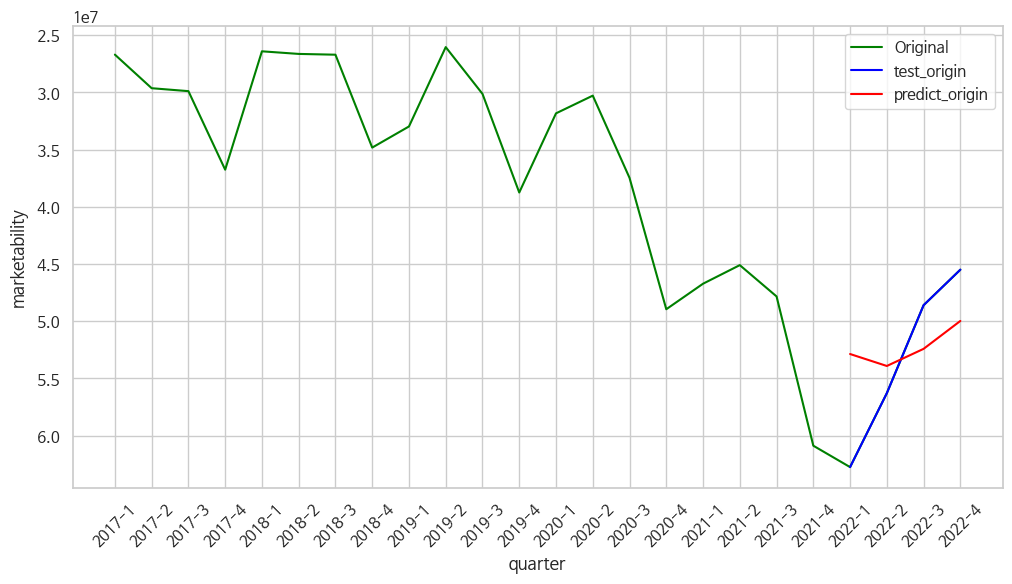

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -9.916952e+05
std      6.685983e+06
min     -9.886788e+06
25%     -4.254463e+06
50%      7.192294e+05
75%      3.981997e+06
max      4.481548e+06
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 16ms/step
[[0.32989645]]
--------------------------------------------------------------------------------
예측된 시장성  : -50636252.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_dent[['성장성', '분기당_매출_금액', '시장성']]
y = ap_dent.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  5321360661 -2.668922e+07
1   0.862320  4588717957 -2.962512e+07
2   1.055867  4845074981 -2.988224e+07
3   0.789289  3824163692 -3.674824e+07
4   1.269831  4856040186 -2.639951e+07
5   0.887759  4310992040 -2.662756e+07
6   1.047237  4514629614 -2.669582e+07
7   0.951438  4295391222 -3.481588e+07
8   1.106587  4753225247 -3.297002e+07
9   0.975977  4639036441 -2.603194e+07
10  1.034247  4797910524 -3.012013e+07
11  0.892406  4281682693 -3.874265e+07
12  0.999305  4278705338 -3.182309e+07
13  0.987328  4224486750 -3.027437e+07
14  1.020236  4309971865 -3.746152e+07
15  0.922552  3976173167 -4.894777e+07
16  1.120847  4456682137 -4.671640e+07
17  1.049094  4675478499 -4.509202e+07
18  0.942365  4406009476 -4.782790e+07
19  0.838510  3694481850 -6.087862e+07
20  0.899441  3322970136 -6.274912e+07
21  1.134685  3770523683 -5.628564e+07
22  1.123164  4234915697 -4.859518e+07
23  0.944840  4001317003 -4.548958e+07
-------------------------

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.69478859 0.45634001 0.38548541]
 [0.32369916 0.3394466  0.4700673 ]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4033
Epoch 1: val_loss improved from inf to 0.47895, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4033 - val_loss: 0.4789
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3861
Epoch 2: val_loss improved from 0.47895 to 0.46317, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3861 - val_loss: 0.4632
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3695
Epoch 3: val_loss improved from 0.46317 to 0.44779, saving model to stock_model.h5
1/1 [==============================] - 0s 65ms/step - loss: 0.3695 - val_loss: 0.4478
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3534
Epoch 4: val_loss improved from 0.44779 to 0.43276, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3534 - val_loss: 0.4328
Epoch 5/100
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 636ms/step
[[0.40588903]
 [0.27101764]
 [0.30971336]
 [0.45082274]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.595331,0.405889
2022-2,0.595331,0.271018
2022-3,0.797665,0.309713
2022-4,0.174144,0.450823


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_dent의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.595331,0.405889,0.000000,-1.835842,1.835842
2022-2,0.595331,0.271018,0.000000,-3.142853,3.142853
2022-3,0.797665,0.309713,1.960784,-2.767861,4.728645
2022-4,0.174144,0.450823,-4.081633,-1.400398,-2.681235


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


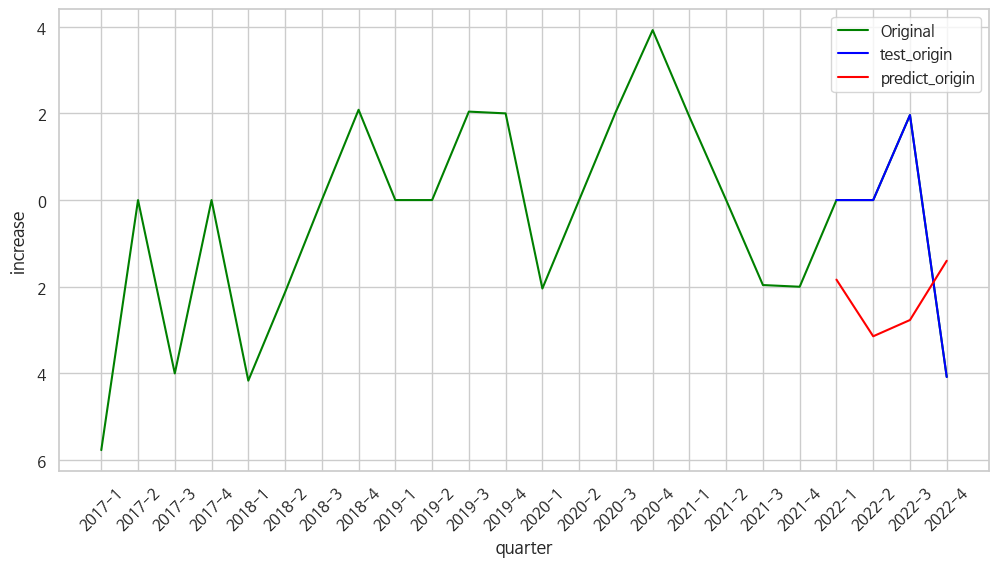

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.756526
std      3.186189
min     -2.681235
25%      0.706573
50%      2.489347
75%      3.539301
max      4.728645
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 16ms/step
[[0.50219417]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.9025678038597107 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

4142748000.0
0.9498756
-50636252.0
-0.9025678


In [70]:
ap_dent.loc[24] = ['2023-1', '치과의원', sales, growth, increase, marketability]

<ipython-input-70-0e9c064ad935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_dent.loc[24] = ['2023-1', '치과의원', sales, growth, increase, marketability]


In [71]:
ap_dent

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,치과의원,5.321361e+09,1.000000,-5.769231,-2.668922e+07
1,2017-2,치과의원,4.588718e+09,0.862320,0.000000,-2.962512e+07
2,2017-3,치과의원,4.845075e+09,1.055867,-4.000000,-2.988224e+07
3,2017-4,치과의원,3.824164e+09,0.789289,0.000000,-3.674824e+07
4,2018-1,치과의원,4.856040e+09,1.269831,-4.166667,-2.639951e+07
5,2018-2,치과의원,4.310992e+09,0.887759,-2.127660,-2.662756e+07
6,2018-3,치과의원,4.514630e+09,1.047237,0.000000,-2.669582e+07
7,2018-4,치과의원,4.295391e+09,0.951438,2.083333,-3.481588e+07
8,2019-1,치과의원,4.753225e+09,1.106587,0.000000,-3.297002e+07
9,2019-2,치과의원,4.639036e+09,0.975977,0.000000,-2.603194e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_dent[['성장성', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.668922e+07 -5.769231
1   0.862320 -2.962512e+07  0.000000
2   1.055867 -2.988224e+07 -4.000000
3   0.789289 -3.674824e+07  0.000000
4   1.269831 -2.639951e+07 -4.166667
5   0.887759 -2.662756e+07 -2.127660
6   1.047237 -2.669582e+07  0.000000
7   0.951438 -3.481588e+07  2.083333
8   1.106587 -3.297002e+07  0.000000
9   0.975977 -2.603194e+07  0.000000
10  1.034247 -3.012013e+07  2.040816
11  0.892406 -3.874265e+07  2.000000
12  0.999305 -3.182309e+07 -2.040816
13  0.987328 -3.027437e+07  0.000000
14  1.020236 -3.746152e+07  2.040816
15  0.922552 -4.894777e+07  3.921569
16  1.120847 -4.671640e+07  1.923077
17  1.049094 -4.509202e+07  0.000000
18  0.942365 -4.782790e+07 -1.960784
19  0.838510 -6.087862e+07 -2.000000
20  0.899441 -6.274912e+07  0.000000
21  1.134685 -5.628564e+07  0.000000
22  1.123164 -4.859518e+07  1.960784
23  0.944840 -4.548958e+07 -4.081633
24  0.949876 -5.063625e+07 -0.902568
--------------------------------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.32369916 0.4700673  0.17414437]
 [0.33417852 0.3298965  0.50219417]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3753
Epoch 1: val_loss improved from inf to 0.23522, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3753 - val_loss: 0.2352
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3589
Epoch 2: val_loss improved from 0.23522 to 0.22507, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.3589 - val_loss: 0.2251
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3433
Epoch 3: val_loss improved from 0.22507 to 0.21537, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.3433 - val_loss: 0.2154
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3282
Epoch 4: val_loss improved from 0.21537 to 0.20605, saving model to stock_model.h5
1/1 [==============================] - 0s 65ms/step - loss: 0.3282 - val_loss: 0.2060
Epoch 5/100
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 630ms/step
[[0.27470955]
 [0.326133  ]
 [0.40606713]
 [0.40813178]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.223957,0.274710
2022-3,0.456340,0.326133
2022-4,0.339447,0.406067
2023-1,0.410219,0.408132


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_dent의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.223957,0.274710,3.770524e+09,3.871947e+09,-101423581.0
2022-3,0.456340,0.326133,4.234916e+09,3.974711e+09,260204401.0
2022-4,0.339447,0.406067,4.001317e+09,4.134451e+09,-133133941.0
2023-1,0.410219,0.408132,4.142748e+09,4.138577e+09,4171008.0


In [81]:
df_test = df_test.reset_index()

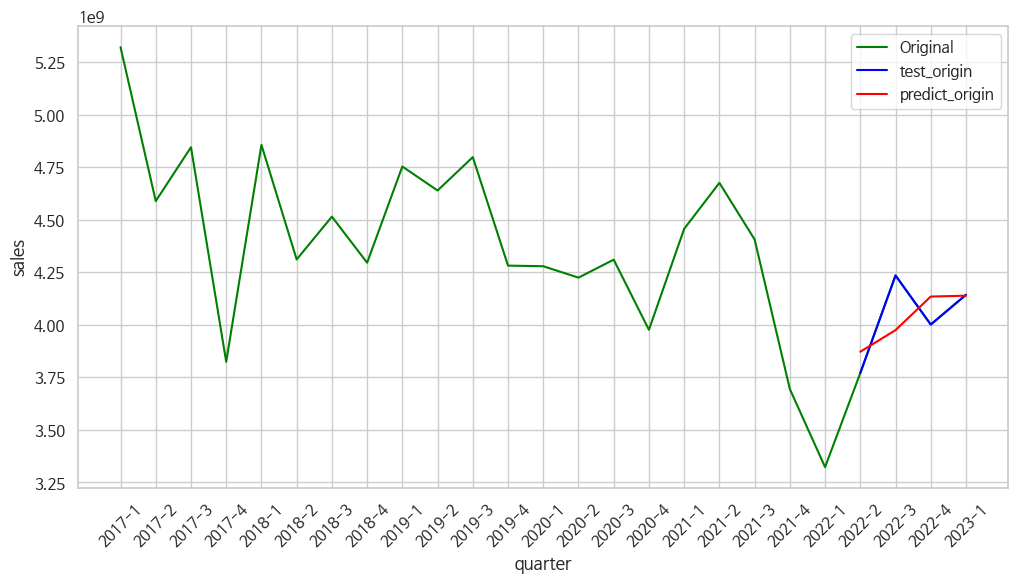

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     7.454472e+06
std      1.784310e+08
min     -1.331339e+08
25%     -1.093512e+08
50%     -4.862629e+07
75%      6.817936e+07
max      2.602044e+08
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.3364811]]
--------------------------------------------------------------------------------
예측된 매출  : 3995390720.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.321361e+09 -2.668922e+07 -5.769231
1   4.588718e+09 -2.962512e+07  0.000000
2   4.845075e+09 -2.988224e+07 -4.000000
3   3.824164e+09 -3.674824e+07  0.000000
4   4.856040e+09 -2.639951e+07 -4.166667
5   4.310992e+09 -2.662756e+07 -2.127660
6   4.514630e+09 -2.669582e+07  0.000000
7   4.295391e+09 -3.481588e+07  2.083333
8   4.753225e+09 -3.297002e+07  0.000000
9   4.639036e+09 -2.603194e+07  0.000000
10  4.797911e+09 -3.012013e+07  2.040816
11  4.281683e+09 -3.874265e+07  2.000000
12  4.278705e+09 -3.182309e+07 -2.040816
13  4.224487e+09 -3.027437e+07  0.000000
14  4.309972e+09 -3.746152e+07  2.040816
15  3.976173e+09 -4.894777e+07  3.921569
16  4.456682e+09 -4.671640e+07  1.923077
17  4.675478e+09 -4.509202e+07  0.000000
18  4.406009e+09 -4.782790e+07 -1.960784
19  3.694482e+09 -6.087862e+07 -2.000000
20  3.322970e+09 -6.274912e+07  0.000000
21  3.770524e+09 -5.628564e+07  0.000000
22  4.234916e+09 -4.859518e+07  1.960784
23  4.001317e+09

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.3394466  0.4700673  0.17414437]
 [0.410219   0.3298965  0.50219417]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2756
Epoch 1: val_loss improved from inf to 0.19879, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2756 - val_loss: 0.1988
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2621
Epoch 2: val_loss improved from 0.19879 to 0.18905, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.2621 - val_loss: 0.1891
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2493
Epoch 3: val_loss improved from 0.18905 to 0.17978, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2493 - val_loss: 0.1798
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2372
Epoch 4: val_loss improved from 0.17978 to 0.17090, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.2372 - val_loss: 0.1709
Epoch 5/100
1/1 [===============

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 558ms/step
[[0.24412881]
 [0.2602137 ]
 [0.32441333]
 [0.34791014]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.718764,0.244129
2022-3,0.694789,0.260214
2022-4,0.323699,0.324413
2023-1,0.334179,0.347910


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 3].values       # 성장성이 ap_dent의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.718764,0.244129,1.134685,0.906603,0.228082
2022-3,0.694789,0.260214,1.123164,0.914332,0.208831
2022-4,0.323699,0.324413,0.944840,0.945183,-0.000343
2023-1,0.334179,0.347910,0.949876,0.956474,-0.006599


In [94]:
df_test = df_test.reset_index()

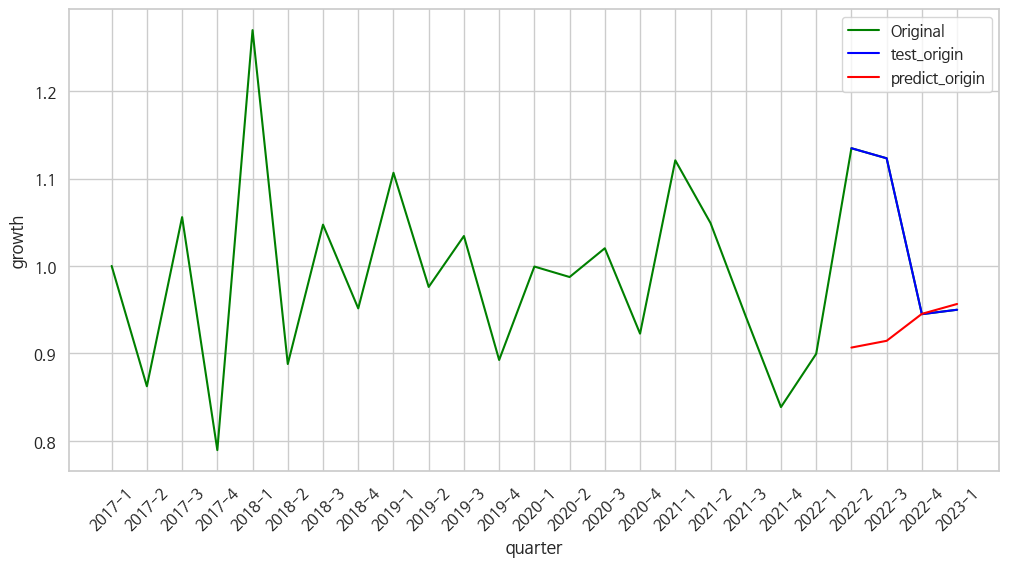

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.107493
std      0.128396
min     -0.006599
25%     -0.001907
50%      0.104244
75%      0.213644
max      0.228082
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 17ms/step
[[0.30205327]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9344381093978882 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_dent.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.321361e+09  1.000000 -5.769231
1   4.588718e+09  0.862320  0.000000
2   4.845075e+09  1.055867 -4.000000
3   3.824164e+09  0.789289  0.000000
4   4.856040e+09  1.269831 -4.166667
5   4.310992e+09  0.887759 -2.127660
6   4.514630e+09  1.047237  0.000000
7   4.295391e+09  0.951438  2.083333
8   4.753225e+09  1.106587  0.000000
9   4.639036e+09  0.975977  0.000000
10  4.797911e+09  1.034247  2.040816
11  4.281683e+09  0.892406  2.000000
12  4.278705e+09  0.999305 -2.040816
13  4.224487e+09  0.987328  0.000000
14  4.309972e+09  1.020236  2.040816
15  3.976173e+09  0.922552  3.921569
16  4.456682e+09  1.120847  1.923077
17  4.675478e+09  1.049094  0.000000
18  4.406009e+09  0.942365 -1.960784
19  3.694482e+09  0.838510 -2.000000
20  3.322970e+09  0.899441  0.000000
21  3.770524e+09  1.134685  0.000000
22  4.234916e+09  1.123164  1.960784
23  4.001317e+09  0.944840 -4.081633
24  4.142748e+09  0.949876 -0.902568
--------------------------------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.3394466  0.32369916 0.17414437]
 [0.410219   0.33417852 0.50219417]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7420
Epoch 1: val_loss improved from inf to 0.12751, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.7420 - val_loss: 0.1275
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.7213
Epoch 2: val_loss improved from 0.12751 to 0.11987, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.7213 - val_loss: 0.1199
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.7012
Epoch 3: val_loss improved from 0.11987 to 0.11263, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.7012 - val_loss: 0.1126
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6816
Epoch 4: val_loss improved from 0.11263 to 0.10574, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.6816 - val_loss: 0.1057
Epoch 5/100
1/1 [=================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 633ms/step
[[0.20002887]
 [0.2234956 ]
 [0.27409908]
 [0.26670575]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.176034,0.200029
2022-3,0.385485,0.223496
2022-4,0.470067,0.274099
2023-1,0.329897,0.266706


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 5].values       # 시장성이 ap_dent의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.176034,0.200029,-5.628564e+07,-55404624.0,-8.810130e+05
2022-3,0.385485,0.223496,-4.859518e+07,-54542992.0,5.947808e+06
2022-4,0.470067,0.274099,-4.548958e+07,-52684972.0,7.195396e+06
2023-1,0.329897,0.266706,-5.063625e+07,-52956436.0,2.320184e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


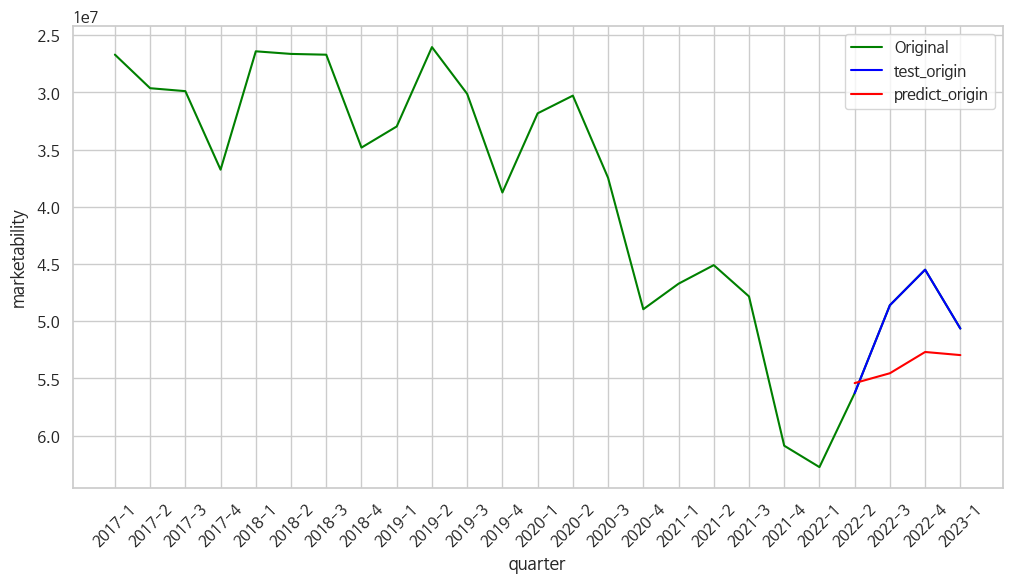

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.645594e+06
std      3.658240e+06
min     -8.810130e+05
25%      1.519885e+06
50%      4.133996e+06
75%      6.259705e+06
max      7.195396e+06
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.21456113]]
--------------------------------------------------------------------------------
예측된 시장성  : -54871040.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '시장성']]
y = ap_dent.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.321361e+09  1.000000 -2.668922e+07
1   4.588718e+09  0.862320 -2.962512e+07
2   4.845075e+09  1.055867 -2.988224e+07
3   3.824164e+09  0.789289 -3.674824e+07
4   4.856040e+09  1.269831 -2.639951e+07
5   4.310992e+09  0.887759 -2.662756e+07
6   4.514630e+09  1.047237 -2.669582e+07
7   4.295391e+09  0.951438 -3.481588e+07
8   4.753225e+09  1.106587 -3.297002e+07
9   4.639036e+09  0.975977 -2.603194e+07
10  4.797911e+09  1.034247 -3.012013e+07
11  4.281683e+09  0.892406 -3.874265e+07
12  4.278705e+09  0.999305 -3.182309e+07
13  4.224487e+09  0.987328 -3.027437e+07
14  4.309972e+09  1.020236 -3.746152e+07
15  3.976173e+09  0.922552 -4.894777e+07
16  4.456682e+09  1.120847 -4.671640e+07
17  4.675478e+09  1.049094 -4.509202e+07
18  4.406009e+09  0.942365 -4.782790e+07
19  3.694482e+09  0.838510 -6.087862e+07
20  3.322970e+09  0.899441 -6.274912e+07
21  3.770524e+09  1.134685 -5.628564e+07
22  4.234916e+09  1.123164 -4.859518e+07
23  4.001317e+09

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.3394466  0.32369916 0.4700673 ]
 [0.410219   0.33417852 0.3298965 ]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4443
Epoch 1: val_loss improved from inf to 0.34401, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4443 - val_loss: 0.3440
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4265
Epoch 2: val_loss improved from 0.34401 to 0.33164, saving model to stock_model.h5
1/1 [==============================] - 0s 64ms/step - loss: 0.4265 - val_loss: 0.3316
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4094
Epoch 3: val_loss improved from 0.33164 to 0.31959, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.4094 - val_loss: 0.3196
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3926
Epoch 4: val_loss improved from 0.31959 to 0.30782, saving model to stock_model.h5
1/1 [==============================] - 0s 62ms/step - loss: 0.3926 - val_loss: 0.3078
Epoch 5/100
1/1 [=================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 595ms/step
[[0.28004196]
 [0.30726367]
 [0.45091373]
 [0.5156478 ]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.595331,0.280042
2022-3,0.797665,0.307264
2022-4,0.174144,0.450914
2023-1,0.502194,0.515648


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_dent의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.595331,0.280042,0.000000,-3.055400,3.055400
2022-3,0.797665,0.307264,1.960784,-2.791600,4.752385
2022-4,0.174144,0.450914,-4.081633,-1.399516,-2.682116
2023-1,0.502194,0.515648,-0.902568,-0.772191,-0.130377


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


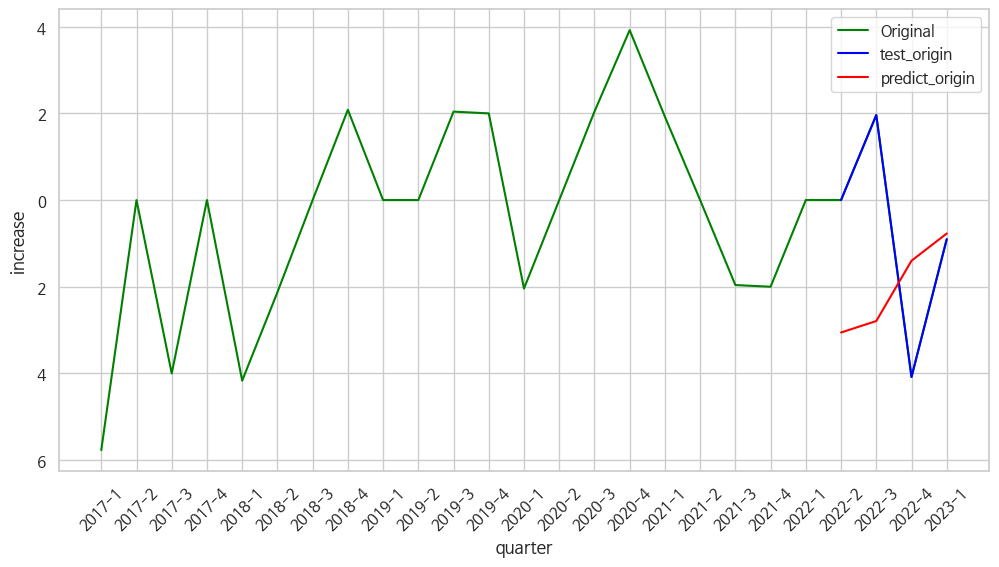

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.248823
std      3.311251
min     -2.682116
25%     -0.768312
50%      1.462512
75%      3.479646
max      4.752385
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 17ms/step
[[0.47758496]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.1410506963729858 


### 추가


In [122]:
ap_dent.loc[25] = ['2023-2', '치과의원', sales, growth, increase, marketability]

<ipython-input-122-ce0df608242b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_dent.loc[25] = ['2023-2', '치과의원', sales, growth, increase, marketability]


In [123]:
ap_dent

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,치과의원,5.321361e+09,1.000000,-5.769231,-2.668922e+07
1,2017-2,치과의원,4.588718e+09,0.862320,0.000000,-2.962512e+07
2,2017-3,치과의원,4.845075e+09,1.055867,-4.000000,-2.988224e+07
3,2017-4,치과의원,3.824164e+09,0.789289,0.000000,-3.674824e+07
4,2018-1,치과의원,4.856040e+09,1.269831,-4.166667,-2.639951e+07
5,2018-2,치과의원,4.310992e+09,0.887759,-2.127660,-2.662756e+07
6,2018-3,치과의원,4.514630e+09,1.047237,0.000000,-2.669582e+07
7,2018-4,치과의원,4.295391e+09,0.951438,2.083333,-3.481588e+07
8,2019-1,치과의원,4.753225e+09,1.106587,0.000000,-3.297002e+07
9,2019-2,치과의원,4.639036e+09,0.975977,0.000000,-2.603194e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_dent[['성장성', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.668922e+07 -5.769231
1   0.862320 -2.962512e+07  0.000000
2   1.055867 -2.988224e+07 -4.000000
3   0.789289 -3.674824e+07  0.000000
4   1.269831 -2.639951e+07 -4.166667
5   0.887759 -2.662756e+07 -2.127660
6   1.047237 -2.669582e+07  0.000000
7   0.951438 -3.481588e+07  2.083333
8   1.106587 -3.297002e+07  0.000000
9   0.975977 -2.603194e+07  0.000000
10  1.034247 -3.012013e+07  2.040816
11  0.892406 -3.874265e+07  2.000000
12  0.999305 -3.182309e+07 -2.040816
13  0.987328 -3.027437e+07  0.000000
14  1.020236 -3.746152e+07  2.040816
15  0.922552 -4.894777e+07  3.921569
16  1.120847 -4.671640e+07  1.923077
17  1.049094 -4.509202e+07  0.000000
18  0.942365 -4.782790e+07 -1.960784
19  0.838510 -6.087862e+07 -2.000000
20  0.899441 -6.274912e+07  0.000000
21  1.134685 -5.628564e+07  0.000000
22  1.123164 -4.859518e+07  1.960784
23  0.944840 -4.548958e+07 -4.081633
24  0.949876 -5.063625e+07 -0.902568
25  0.934438 -5.487104e+07 -1.141051
-

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.33417852 0.3298965  0.50219417]
 [0.30205335 0.21456116 0.47758496]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3743
Epoch 1: val_loss improved from inf to 0.17628, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3743 - val_loss: 0.1763
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3580
Epoch 2: val_loss improved from 0.17628 to 0.16850, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3580 - val_loss: 0.1685
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3423
Epoch 3: val_loss improved from 0.16850 to 0.16107, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3423 - val_loss: 0.1611
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3273
Epoch 4: val_loss improved from 0.16107 to 0.15397, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.3273 - val_loss: 0.1540
Epoch 5/100
1/1 [=================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 598ms/step
[[0.31154567]
 [0.38617313]
 [0.3869647 ]
 [0.3189364 ]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.456340,0.311546
2022-4,0.339447,0.386173
2023-1,0.410219,0.386965
2023-2,0.336481,0.318936


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_dent의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.456340,0.311546,4.234916e+09,3.945560e+09,289355633.0
2022-4,0.339447,0.386173,4.001317e+09,4.094695e+09,-93378165.0
2023-1,0.410219,0.386965,4.142748e+09,4.096277e+09,46470912.0
2023-2,0.336481,0.318936,3.995391e+09,3.960330e+09,35060992.0


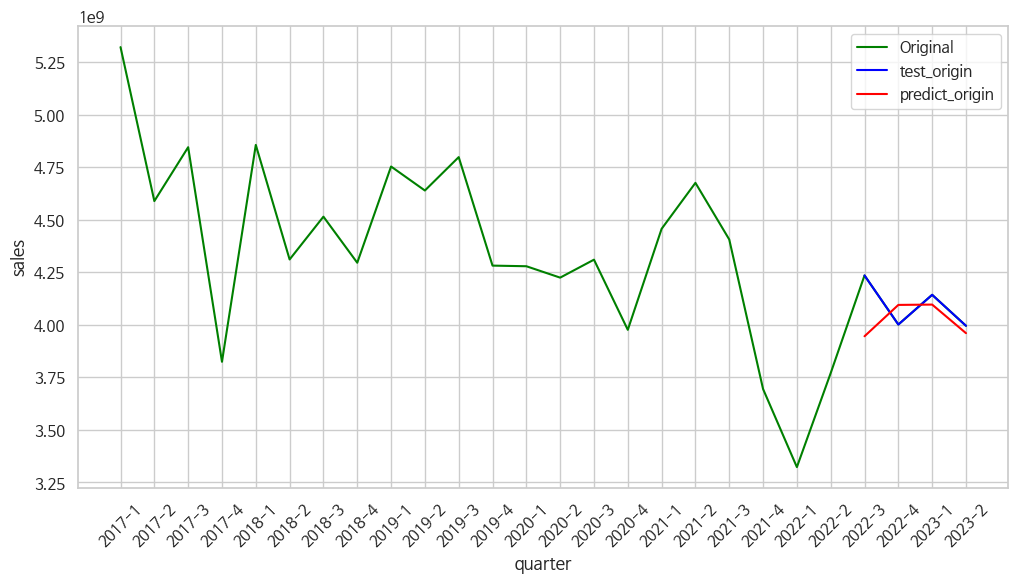

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.937734e+07
std      1.597729e+08
min     -9.337816e+07
25%      2.951203e+06
50%      4.076595e+07
75%      1.071921e+08
max      2.893556e+08
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 20ms/step
[[0.3284056]]
--------------------------------------------------------------------------------
예측된 매출  : 3979252736.0 


### 성장성

In [136]:
X = ap_dent[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.321361e+09 -2.668922e+07 -5.769231
1   4.588718e+09 -2.962512e+07  0.000000
2   4.845075e+09 -2.988224e+07 -4.000000
3   3.824164e+09 -3.674824e+07  0.000000
4   4.856040e+09 -2.639951e+07 -4.166667
5   4.310992e+09 -2.662756e+07 -2.127660
6   4.514630e+09 -2.669582e+07  0.000000
7   4.295391e+09 -3.481588e+07  2.083333
8   4.753225e+09 -3.297002e+07  0.000000
9   4.639036e+09 -2.603194e+07  0.000000
10  4.797911e+09 -3.012013e+07  2.040816
11  4.281683e+09 -3.874265e+07  2.000000
12  4.278705e+09 -3.182309e+07 -2.040816
13  4.224487e+09 -3.027437e+07  0.000000
14  4.309972e+09 -3.746152e+07  2.040816
15  3.976173e+09 -4.894777e+07  3.921569
16  4.456682e+09 -4.671640e+07  1.923077
17  4.675478e+09 -4.509202e+07  0.000000
18  4.406009e+09 -4.782790e+07 -1.960784
19  3.694482e+09 -6.087862e+07 -2.000000
20  3.322970e+09 -6.274912e+07  0.000000
21  3.770524e+09 -5.628564e+07  0.000000
22  4.234916e+09 -4.859518e+07  1.960784
23  4.001317e+09

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.410219   0.3298965  0.50219417]
 [0.33648107 0.21456116 0.47758496]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2921
Epoch 1: val_loss improved from inf to 0.20109, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2921 - val_loss: 0.2011
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2782
Epoch 2: val_loss improved from 0.20109 to 0.19291, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2782 - val_loss: 0.1929
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2650
Epoch 3: val_loss improved from 0.19291 to 0.18508, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2650 - val_loss: 0.1851
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 4: val_loss improved from 0.18508 to 0.17757, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2524 - val_loss: 0.1776
Epoch 5/100
1/1 [=================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 584ms/step
[[0.26695588]
 [0.33197603]
 [0.35475492]
 [0.30613965]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.694789,0.266956
2022-4,0.323699,0.331976
2023-1,0.334179,0.354755
2023-2,0.302053,0.306140


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 3].values       # 성장성이 ap_dent의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.694789,0.266956,1.123164,0.917572,0.205592
2022-4,0.323699,0.331976,0.944840,0.948817,-0.003977
2023-1,0.334179,0.354755,0.949876,0.959763,-0.009888
2023-2,0.302053,0.306140,0.934438,0.936402,-0.001964


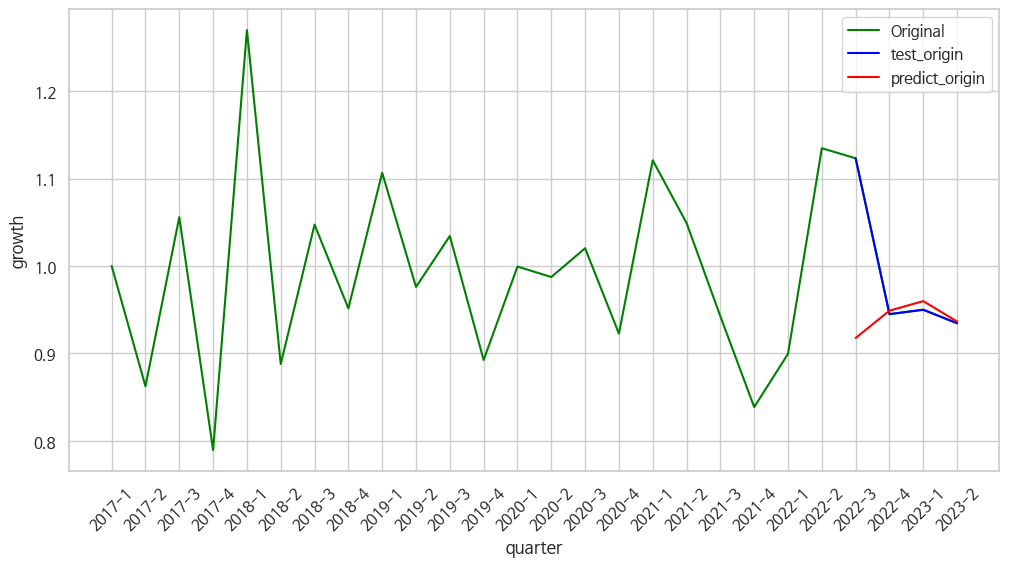

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.047441
std      0.105488
min     -0.009888
25%     -0.005455
50%     -0.002971
75%      0.049925
max      0.205592
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.32182086]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9439372420310974 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_dent.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.321361e+09  1.000000 -5.769231
1   4.588718e+09  0.862320  0.000000
2   4.845075e+09  1.055867 -4.000000
3   3.824164e+09  0.789289  0.000000
4   4.856040e+09  1.269831 -4.166667
5   4.310992e+09  0.887759 -2.127660
6   4.514630e+09  1.047237  0.000000
7   4.295391e+09  0.951438  2.083333
8   4.753225e+09  1.106587  0.000000
9   4.639036e+09  0.975977  0.000000
10  4.797911e+09  1.034247  2.040816
11  4.281683e+09  0.892406  2.000000
12  4.278705e+09  0.999305 -2.040816
13  4.224487e+09  0.987328  0.000000
14  4.309972e+09  1.020236  2.040816
15  3.976173e+09  0.922552  3.921569
16  4.456682e+09  1.120847  1.923077
17  4.675478e+09  1.049094  0.000000
18  4.406009e+09  0.942365 -1.960784
19  3.694482e+09  0.838510 -2.000000
20  3.322970e+09  0.899441  0.000000
21  3.770524e+09  1.134685  0.000000
22  4.234916e+09  1.123164  1.960784
23  4.001317e+09  0.944840 -4.081633
24  4.142748e+09  0.949876 -0.902568
25  3.995391e+09  0.934438 -1.141051
-

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.410219   0.33417852 0.50219417]
 [0.33648107 0.30205335 0.47758496]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7068
Epoch 1: val_loss improved from inf to 0.09337, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.7068 - val_loss: 0.0934
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6867
Epoch 2: val_loss improved from 0.09337 to 0.08745, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.6867 - val_loss: 0.0875
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6672
Epoch 3: val_loss improved from 0.08745 to 0.08187, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.6672 - val_loss: 0.0819
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6481
Epoch 4: val_loss improved from 0.08187 to 0.07660, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.6481 - val_loss: 0.0766
Epoch 5/100
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 721ms/step
[[0.20848238]
 [0.254245  ]
 [0.24700966]
 [0.19915572]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.385485,0.208482
2022-4,0.470067,0.254245
2023-1,0.329897,0.247010
2023-2,0.214561,0.199156


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 5].values       # 시장성이 ap_dent의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.385485,0.208482,-4.859518e+07,-55094236.0,6.499052e+06
2022-4,0.470067,0.254245,-4.548958e+07,-53413960.0,7.924384e+06
2023-1,0.329897,0.247010,-5.063625e+07,-53679624.0,3.043372e+06
2023-2,0.214561,0.199156,-5.487104e+07,-55436684.0,5.656440e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


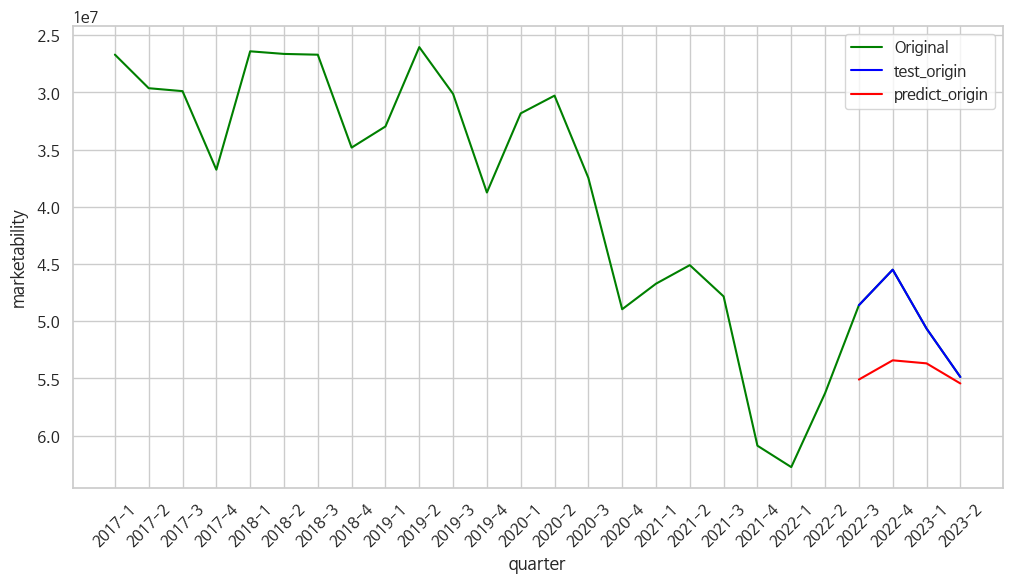

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.508113e+06
std      3.332830e+06
min      5.656440e+05
25%      2.423940e+06
50%      4.771212e+06
75%      6.855385e+06
max      7.924384e+06
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.22425616]]
--------------------------------------------------------------------------------
예측된 시장성  : -54515068.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '시장성']]
y = ap_dent.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.321361e+09  1.000000 -2.668922e+07
1   4.588718e+09  0.862320 -2.962512e+07
2   4.845075e+09  1.055867 -2.988224e+07
3   3.824164e+09  0.789289 -3.674824e+07
4   4.856040e+09  1.269831 -2.639951e+07
5   4.310992e+09  0.887759 -2.662756e+07
6   4.514630e+09  1.047237 -2.669582e+07
7   4.295391e+09  0.951438 -3.481588e+07
8   4.753225e+09  1.106587 -3.297002e+07
9   4.639036e+09  0.975977 -2.603194e+07
10  4.797911e+09  1.034247 -3.012013e+07
11  4.281683e+09  0.892406 -3.874265e+07
12  4.278705e+09  0.999305 -3.182309e+07
13  4.224487e+09  0.987328 -3.027437e+07
14  4.309972e+09  1.020236 -3.746152e+07
15  3.976173e+09  0.922552 -4.894777e+07
16  4.456682e+09  1.120847 -4.671640e+07
17  4.675478e+09  1.049094 -4.509202e+07
18  4.406009e+09  0.942365 -4.782790e+07
19  3.694482e+09  0.838510 -6.087862e+07
20  3.322970e+09  0.899441 -6.274912e+07
21  3.770524e+09  1.134685 -5.628564e+07
22  4.234916e+09  1.123164 -4.859518e+07
23  4.001317e+09

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.410219   0.33417852 0.3298965 ]
 [0.33648107 0.30205335 0.21456116]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4593
Epoch 1: val_loss improved from inf to 0.28494, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4593 - val_loss: 0.2849
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4415
Epoch 2: val_loss improved from 0.28494 to 0.27480, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.4415 - val_loss: 0.2748
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4242
Epoch 3: val_loss improved from 0.27480 to 0.26495, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.4242 - val_loss: 0.2649
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4074
Epoch 4: val_loss improved from 0.26495 to 0.25534, saving model to stock_model.h5
1/1 [==============================] - 0s 63ms/step - loss: 0.4074 - val_loss: 0.2553
Epoch 5/100
1/1 [=================

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 796ms/step
[[0.30868155]
 [0.45406595]
 [0.5199335 ]
 [0.48125112]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.797665,0.308682
2022-4,0.174144,0.454066
2023-1,0.502194,0.519934
2023-2,0.477585,0.481251


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_dent의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.797665,0.308682,1.960784,-2.777860,4.738644
2022-4,0.174144,0.454066,-4.081633,-1.368969,-2.712664
2023-1,0.502194,0.519934,-0.902568,-0.730659,-0.171908
2023-2,0.477585,0.481251,-1.141051,-1.105523,-0.035528


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


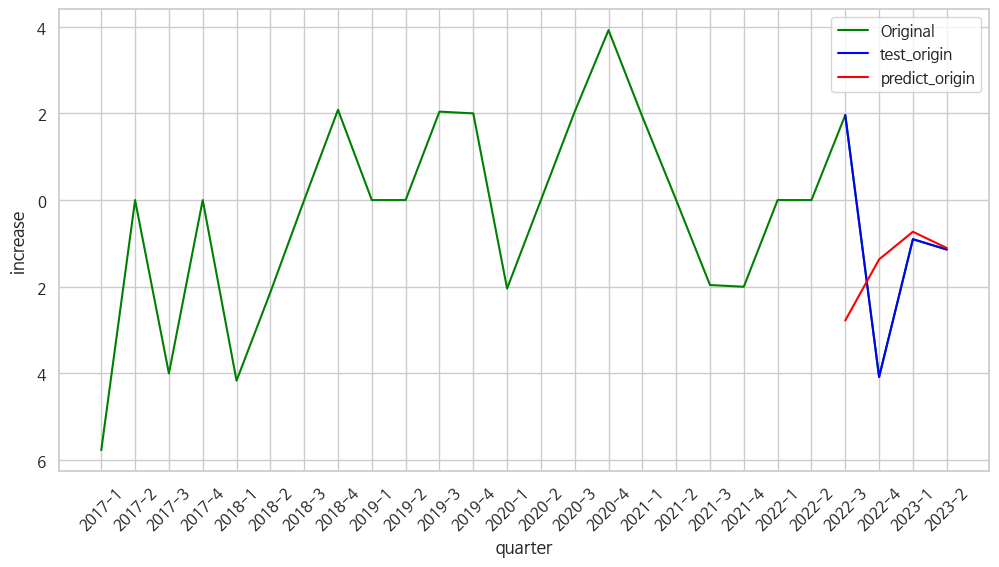

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.454636
std      3.110055
min     -2.712664
25%     -0.807097
50%     -0.103718
75%      1.158015
max      4.738644
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 28ms/step
[[0.438063]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.524050235748291 


### 추가

In [172]:
ap_dent.loc[26] = ['2023-3', '치과의원', sales, growth, increase, marketability]

<ipython-input-172-9474bb615765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_dent.loc[26] = ['2023-3', '치과의원', sales, growth, increase, marketability]


In [173]:
ap_dent

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,치과의원,5.321361e+09,1.000000,-5.769231,-2.668922e+07
1,2017-2,치과의원,4.588718e+09,0.862320,0.000000,-2.962512e+07
2,2017-3,치과의원,4.845075e+09,1.055867,-4.000000,-2.988224e+07
3,2017-4,치과의원,3.824164e+09,0.789289,0.000000,-3.674824e+07
4,2018-1,치과의원,4.856040e+09,1.269831,-4.166667,-2.639951e+07
5,2018-2,치과의원,4.310992e+09,0.887759,-2.127660,-2.662756e+07
6,2018-3,치과의원,4.514630e+09,1.047237,0.000000,-2.669582e+07
7,2018-4,치과의원,4.295391e+09,0.951438,2.083333,-3.481588e+07
8,2019-1,치과의원,4.753225e+09,1.106587,0.000000,-3.297002e+07
9,2019-2,치과의원,4.639036e+09,0.975977,0.000000,-2.603194e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_dent[['성장성', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.668922e+07 -5.769231
1   0.862320 -2.962512e+07  0.000000
2   1.055867 -2.988224e+07 -4.000000
3   0.789289 -3.674824e+07  0.000000
4   1.269831 -2.639951e+07 -4.166667
5   0.887759 -2.662756e+07 -2.127660
6   1.047237 -2.669582e+07  0.000000
7   0.951438 -3.481588e+07  2.083333
8   1.106587 -3.297002e+07  0.000000
9   0.975977 -2.603194e+07  0.000000
10  1.034247 -3.012013e+07  2.040816
11  0.892406 -3.874265e+07  2.000000
12  0.999305 -3.182309e+07 -2.040816
13  0.987328 -3.027437e+07  0.000000
14  1.020236 -3.746152e+07  2.040816
15  0.922552 -4.894777e+07  3.921569
16  1.120847 -4.671640e+07  1.923077
17  1.049094 -4.509202e+07  0.000000
18  0.942365 -4.782790e+07 -1.960784
19  0.838510 -6.087862e+07 -2.000000
20  0.899441 -6.274912e+07  0.000000
21  1.134685 -5.628564e+07  0.000000
22  1.123164 -4.859518e+07  1.960784
23  0.944840 -4.548958e+07 -4.081633
24  0.949876 -5.063625e+07 -0.902568
25  0.934438 -5.487104e+07 -1.141051
2

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.30205335 0.21456116 0.47758496]
 [0.3218209  0.22425613 0.43806299]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3743
Epoch 1: val_loss improved from inf to 0.18205, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3743 - val_loss: 0.1820
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3580
Epoch 2: val_loss improved from 0.18205 to 0.17418, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.3580 - val_loss: 0.1742
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3423
Epoch 3: val_loss improved from 0.17418 to 0.16666, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.3423 - val_loss: 0.1667
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3273
Epoch 4: val_loss improved from 0.16666 to 0.15944, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3273 - val_loss: 0.1594
Epoch 5/100
1/1 [=================

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.40919524]
 [0.4104558 ]
 [0.33724385]
 [0.34728467]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.339447,0.409195
2023-1,0.410219,0.410456
2023-2,0.336481,0.337244
2023-3,0.328406,0.347285


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_dent의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.339447,0.409195,4.001317e+09,4.140702e+09,-139384949.0
2023-1,0.410219,0.410456,4.142748e+09,4.143221e+09,-473088.0
2023-2,0.336481,0.337244,3.995391e+09,3.996915e+09,-1524224.0
2023-3,0.328406,0.347285,3.979253e+09,4.016981e+09,-37728000.0


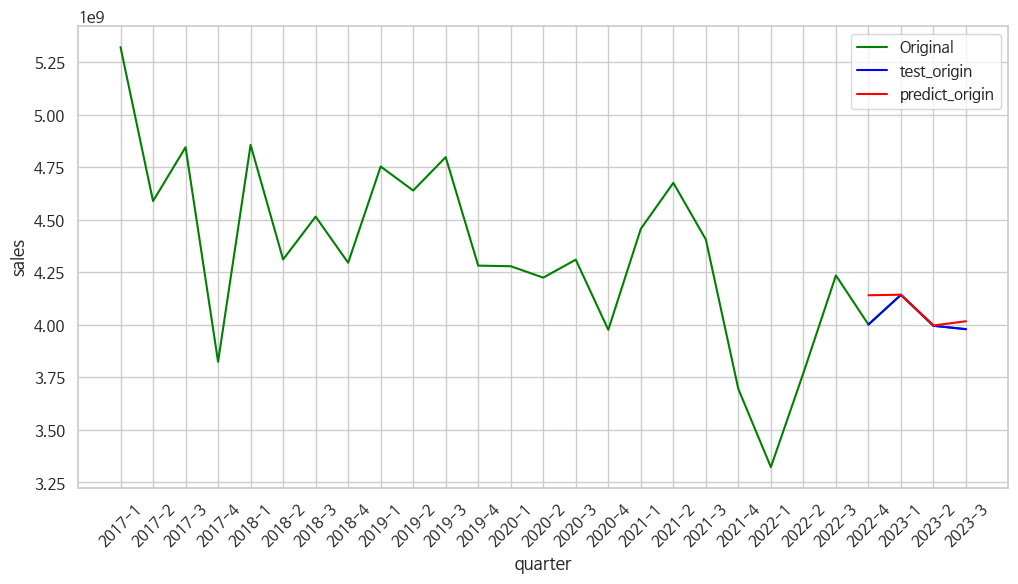

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -4.477757e+07
std      6.540640e+07
min     -1.393849e+08
25%     -6.314224e+07
50%     -1.962611e+07
75%     -1.261440e+06
max     -4.730880e+05
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 19ms/step
[[0.32703936]]
--------------------------------------------------------------------------------
예측된 매출  : 3976522496.0 


### 성장성

In [186]:
X = ap_dent[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.321361e+09 -2.668922e+07 -5.769231
1   4.588718e+09 -2.962512e+07  0.000000
2   4.845075e+09 -2.988224e+07 -4.000000
3   3.824164e+09 -3.674824e+07  0.000000
4   4.856040e+09 -2.639951e+07 -4.166667
5   4.310992e+09 -2.662756e+07 -2.127660
6   4.514630e+09 -2.669582e+07  0.000000
7   4.295391e+09 -3.481588e+07  2.083333
8   4.753225e+09 -3.297002e+07  0.000000
9   4.639036e+09 -2.603194e+07  0.000000
10  4.797911e+09 -3.012013e+07  2.040816
11  4.281683e+09 -3.874265e+07  2.000000
12  4.278705e+09 -3.182309e+07 -2.040816
13  4.224487e+09 -3.027437e+07  0.000000
14  4.309972e+09 -3.746152e+07  2.040816
15  3.976173e+09 -4.894777e+07  3.921569
16  4.456682e+09 -4.671640e+07  1.923077
17  4.675478e+09 -4.509202e+07  0.000000
18  4.406009e+09 -4.782790e+07 -1.960784
19  3.694482e+09 -6.087862e+07 -2.000000
20  3.322970e+09 -6.274912e+07  0.000000
21  3.770524e+09 -5.628564e+07  0.000000
22  4.234916e+09 -4.859518e+07  1.960784
23  4.001317e+09

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.33648107 0.21456116 0.47758496]
 [0.32840558 0.22425613 0.43806299]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2921
Epoch 1: val_loss improved from inf to 0.24825, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2921 - val_loss: 0.2483
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2782
Epoch 2: val_loss improved from 0.24825 to 0.23950, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.2782 - val_loss: 0.2395
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2650
Epoch 3: val_loss improved from 0.23950 to 0.23107, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.2650 - val_loss: 0.2311
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 4: val_loss improved from 0.23107 to 0.22297, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.2524 - val_loss: 0.2230
Epoch 5/100
1/1 [=================

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 571ms/step
[[0.37206623]
 [0.39963618]
 [0.34374604]
 [0.36141047]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.323699,0.372066
2023-1,0.334179,0.399636
2023-2,0.302053,0.343746
2023-3,0.321821,0.361410


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 3].values       # 성장성이 ap_dent의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.323699,0.372066,0.944840,0.968082,-0.023242
2023-1,0.334179,0.399636,0.949876,0.981331,-0.031455
2023-2,0.302053,0.343746,0.934438,0.954473,-0.020035
2023-3,0.321821,0.361410,0.943937,0.962962,-0.019024


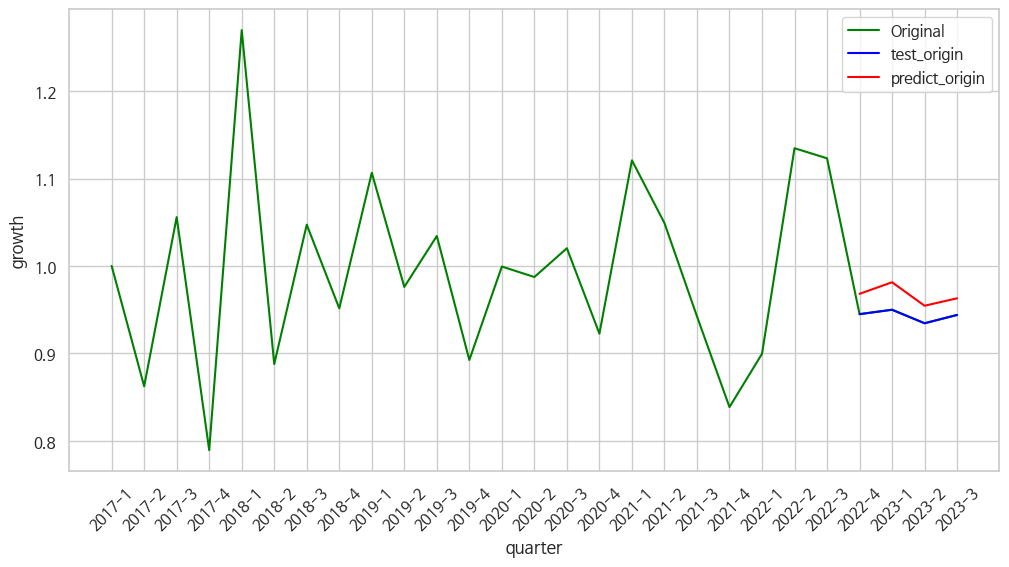

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.023439
std      0.005638
min     -0.031455
25%     -0.025296
50%     -0.021639
75%     -0.019782
max     -0.019024
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.33694288]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9512040019035339 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_dent.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.321361e+09  1.000000 -5.769231
1   4.588718e+09  0.862320  0.000000
2   4.845075e+09  1.055867 -4.000000
3   3.824164e+09  0.789289  0.000000
4   4.856040e+09  1.269831 -4.166667
5   4.310992e+09  0.887759 -2.127660
6   4.514630e+09  1.047237  0.000000
7   4.295391e+09  0.951438  2.083333
8   4.753225e+09  1.106587  0.000000
9   4.639036e+09  0.975977  0.000000
10  4.797911e+09  1.034247  2.040816
11  4.281683e+09  0.892406  2.000000
12  4.278705e+09  0.999305 -2.040816
13  4.224487e+09  0.987328  0.000000
14  4.309972e+09  1.020236  2.040816
15  3.976173e+09  0.922552  3.921569
16  4.456682e+09  1.120847  1.923077
17  4.675478e+09  1.049094  0.000000
18  4.406009e+09  0.942365 -1.960784
19  3.694482e+09  0.838510 -2.000000
20  3.322970e+09  0.899441  0.000000
21  3.770524e+09  1.134685  0.000000
22  4.234916e+09  1.123164  1.960784
23  4.001317e+09  0.944840 -4.081633
24  4.142748e+09  0.949876 -0.902568
25  3.995391e+09  0.934438 -1.141051
2

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.33648107 0.30205335 0.47758496]
 [0.32840558 0.3218209  0.43806299]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7068
Epoch 1: val_loss improved from inf to 0.10436, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.7068 - val_loss: 0.1044
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6867
Epoch 2: val_loss improved from 0.10436 to 0.09808, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.6867 - val_loss: 0.0981
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6672
Epoch 3: val_loss improved from 0.09808 to 0.09213, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.6672 - val_loss: 0.0921
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6481
Epoch 4: val_loss improved from 0.09213 to 0.08649, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.6481 - val_loss: 0.0865
Epoch 5/100
1/1 [================

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 569ms/step
[[0.27506343]
 [0.26725933]
 [0.21453339]
 [0.24189094]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.470067,0.275063
2023-1,0.329897,0.267259
2023-2,0.214561,0.214533
2023-3,0.224256,0.241891


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 5].values       # 시장성이 ap_dent의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.470067,0.275063,-4.548958e+07,-52649568.0,7.159992e+06
2023-1,0.329897,0.267259,-5.063625e+07,-52936112.0,2.299860e+06
2023-2,0.214561,0.214533,-5.487104e+07,-54872060.0,1.020000e+03
2023-3,0.224256,0.241891,-5.451507e+07,-53867568.0,-6.475000e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


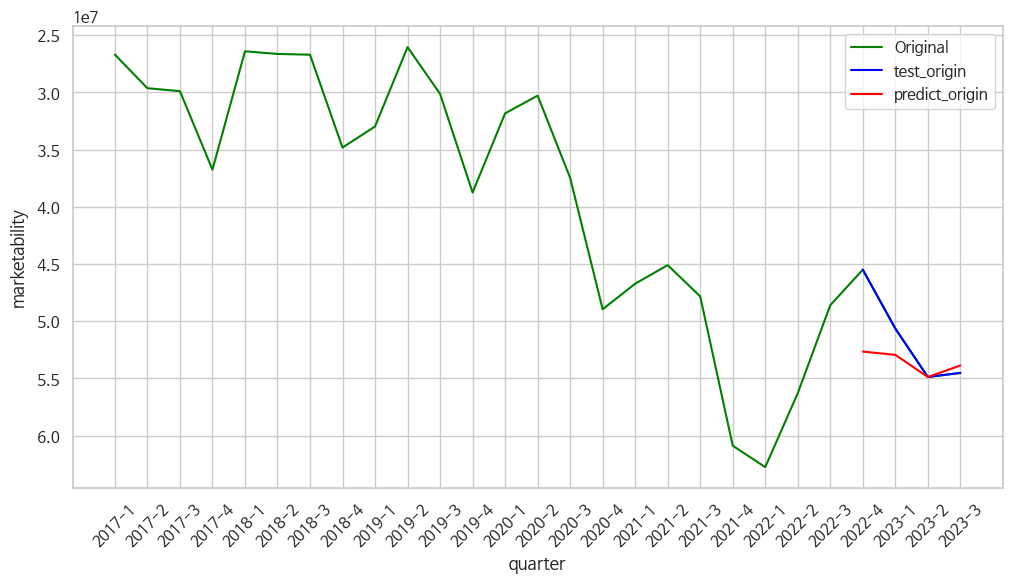

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.203343e+06
std      3.538136e+06
min     -6.475000e+05
25%     -1.611100e+05
50%      1.150440e+06
75%      3.514893e+06
max      7.159992e+06
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 17ms/step
[[0.2317949]]
--------------------------------------------------------------------------------
예측된 시장성  : -54238268.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_dent[['분기당_매출_금액', '성장성', '시장성']]
y = ap_dent.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.321361e+09  1.000000 -2.668922e+07
1   4.588718e+09  0.862320 -2.962512e+07
2   4.845075e+09  1.055867 -2.988224e+07
3   3.824164e+09  0.789289 -3.674824e+07
4   4.856040e+09  1.269831 -2.639951e+07
5   4.310992e+09  0.887759 -2.662756e+07
6   4.514630e+09  1.047237 -2.669582e+07
7   4.295391e+09  0.951438 -3.481588e+07
8   4.753225e+09  1.106587 -3.297002e+07
9   4.639036e+09  0.975977 -2.603194e+07
10  4.797911e+09  1.034247 -3.012013e+07
11  4.281683e+09  0.892406 -3.874265e+07
12  4.278705e+09  0.999305 -3.182309e+07
13  4.224487e+09  0.987328 -3.027437e+07
14  4.309972e+09  1.020236 -3.746152e+07
15  3.976173e+09  0.922552 -4.894777e+07
16  4.456682e+09  1.120847 -4.671640e+07
17  4.675478e+09  1.049094 -4.509202e+07
18  4.406009e+09  0.942365 -4.782790e+07
19  3.694482e+09  0.838510 -6.087862e+07
20  3.322970e+09  0.899441 -6.274912e+07
21  3.770524e+09  1.134685 -5.628564e+07
22  4.234916e+09  1.123164 -4.859518e+07
23  4.001317e+09

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.33648107 0.30205335 0.21456116]
 [0.32840558 0.3218209  0.22425613]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4593
Epoch 1: val_loss improved from inf to 0.34664, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4593 - val_loss: 0.3466
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4415
Epoch 2: val_loss improved from 0.34664 to 0.33623, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.4415 - val_loss: 0.3362
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4242
Epoch 3: val_loss improved from 0.33623 to 0.32609, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4242 - val_loss: 0.3261
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4074
Epoch 4: val_loss improved from 0.32609 to 0.31618, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.4074 - val_loss: 0.3162
Epoch 5/100
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 739ms/step
[[0.4641181 ]
 [0.52880365]
 [0.4889725 ]
 [0.445227  ]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.174144,0.464118
2023-1,0.502194,0.528804
2023-2,0.477585,0.488973
2023-3,0.438063,0.445227


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_dent의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.174144,0.464118,-4.081633,-1.271556,-2.810077
2023-1,0.502194,0.528804,-0.902568,-0.644701,-0.257867
2023-2,0.477585,0.488973,-1.141051,-1.030696,-0.110355
2023-3,0.438063,0.445227,-1.524050,-1.454625,-0.069425


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


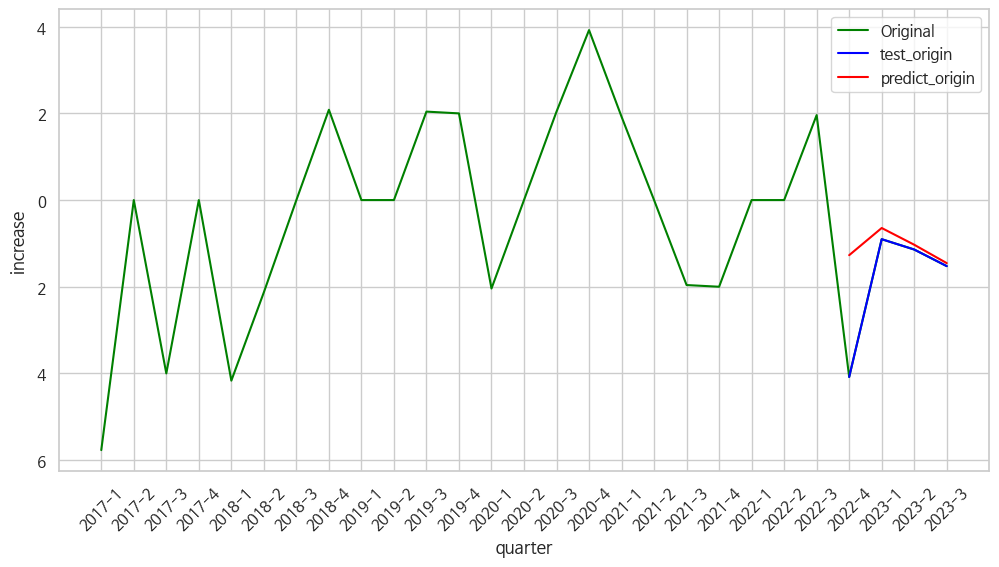

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_dent['분기'], ap_dent['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.811931
std      1.334554
min     -2.810077
25%     -0.895920
50%     -0.184111
75%     -0.100122
max     -0.069425
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 29ms/step
[[0.40778005]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.8175162076950073 


### 추가

In [222]:
ap_dent.loc[27] = ['2023-4', '치과의원', sales, growth, increase, marketability]

<ipython-input-222-f2843047b0b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_dent.loc[27] = ['2023-4', '치과의원', sales, growth, increase, marketability]


In [223]:
final_ap_dent = ap_dent
final_ap_dent

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,치과의원,5.321361e+09,1.000000,-5.769231,-2.668922e+07
1,2017-2,치과의원,4.588718e+09,0.862320,0.000000,-2.962512e+07
2,2017-3,치과의원,4.845075e+09,1.055867,-4.000000,-2.988224e+07
3,2017-4,치과의원,3.824164e+09,0.789289,0.000000,-3.674824e+07
4,2018-1,치과의원,4.856040e+09,1.269831,-4.166667,-2.639951e+07
5,2018-2,치과의원,4.310992e+09,0.887759,-2.127660,-2.662756e+07
6,2018-3,치과의원,4.514630e+09,1.047237,0.000000,-2.669582e+07
7,2018-4,치과의원,4.295391e+09,0.951438,2.083333,-3.481588e+07
8,2019-1,치과의원,4.753225e+09,1.106587,0.000000,-3.297002e+07
9,2019-2,치과의원,4.639036e+09,0.975977,0.000000,-2.603194e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_dent[['성장성', '시장성', '순점포증감률']]
y = ap_dent.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.668922e+07 -5.769231
1   0.862320 -2.962512e+07  0.000000
2   1.055867 -2.988224e+07 -4.000000
3   0.789289 -3.674824e+07  0.000000
4   1.269831 -2.639951e+07 -4.166667
5   0.887759 -2.662756e+07 -2.127660
6   1.047237 -2.669582e+07  0.000000
7   0.951438 -3.481588e+07  2.083333
8   1.106587 -3.297002e+07  0.000000
9   0.975977 -2.603194e+07  0.000000
10  1.034247 -3.012013e+07  2.040816
11  0.892406 -3.874265e+07  2.000000
12  0.999305 -3.182309e+07 -2.040816
13  0.987328 -3.027437e+07  0.000000
14  1.020236 -3.746152e+07  2.040816
15  0.922552 -4.894777e+07  3.921569
16  1.120847 -4.671640e+07  1.923077
17  1.049094 -4.509202e+07  0.000000
18  0.942365 -4.782790e+07 -1.960784
19  0.838510 -6.087862e+07 -2.000000
20  0.899441 -6.274912e+07  0.000000
21  1.134685 -5.628564e+07  0.000000
22  1.123164 -4.859518e+07  1.960784
23  0.944840 -4.548958e+07 -4.081633
24  0.949876 -5.063625e+07 -0.902568
25  0.934438 -5.487104e+07 -1.141051
2

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.3218209  0.22425613 0.43806299]
 [0.33694291 0.23179484 0.40778004]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3820
Epoch 1: val_loss improved from inf to 0.12248, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3820 - val_loss: 0.1225
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3655
Epoch 2: val_loss improved from 0.12248 to 0.11606, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3655 - val_loss: 0.1161
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3498
Epoch 3: val_loss improved from 0.11606 to 0.11000, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3498 - val_loss: 0.1100
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3347
Epoch 4: val_loss improved from 0.11000 to 0.10424, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.3347 - val_loss: 0.1042
Epoch 5/100
1/1 [=================

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 612ms/step
[[0.3437071 ]
 [0.28274894]
 [0.29394165]
 [0.27790582]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_dent.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.410219,0.343707
2023-2,0.336481,0.282749
2023-3,0.328406,0.293942
2023-4,0.327039,0.277906


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_dent.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_dent의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.410219,0.343707,4.142748e+09,4.009831e+09,132916736.0
2023-2,0.336481,0.282749,3.995391e+09,3.888013e+09,107377920.0
2023-3,0.328406,0.293942,3.979253e+09,3.910380e+09,68872448.0
2023-4,0.327039,0.277906,3.976522e+09,3.878334e+09,98188032.0


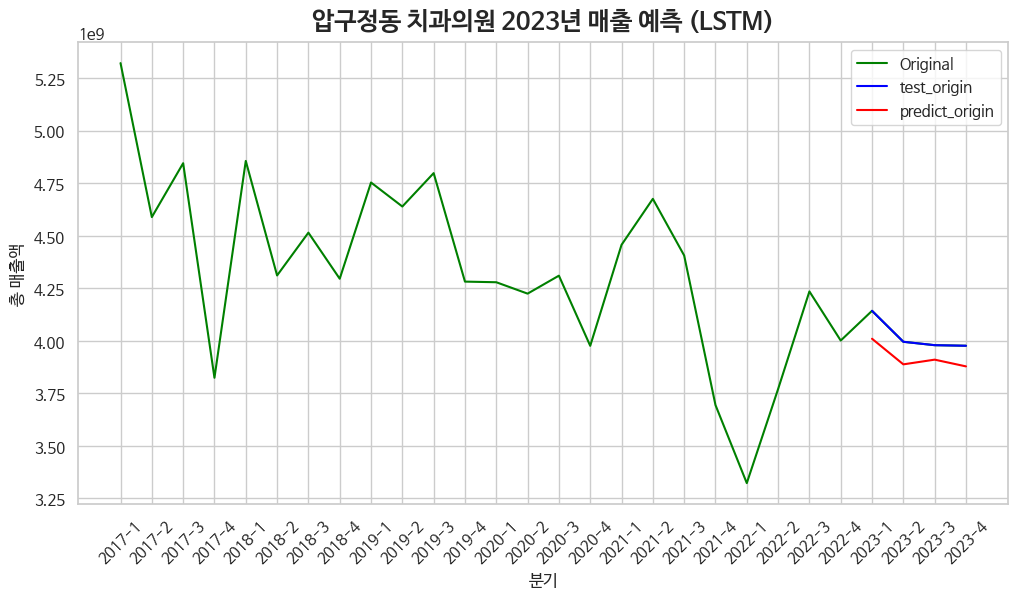

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))

plt.title('압구정동 치과의원 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)

plt.plot(ap_dent['분기'], ap_dent['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()